# Diabetes Classification

# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [23]:
df = pd.read_csv('diabetes.csv')

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.shape

(768, 9)

In [27]:
#768 rows and 9 columns

In [28]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

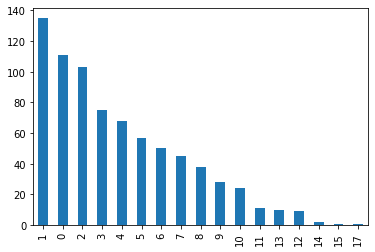

In [30]:
df['Pregnancies'].value_counts().plot.bar()

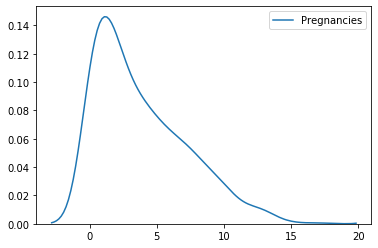

In [31]:
sns.kdeplot(df['Pregnancies'])
plt.show()

In [32]:
##We can see that pregnanies is continuous in nature. Similarly we will check for all other variables

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


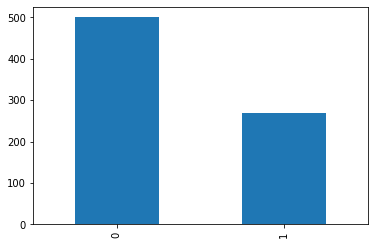

In [34]:
df['Outcome'].value_counts().plot.bar() ##WE can see that the Target-Outcome is categorical

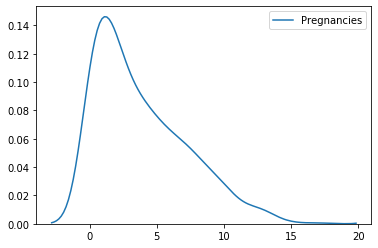

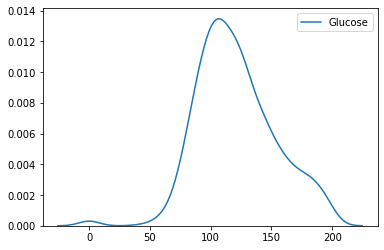

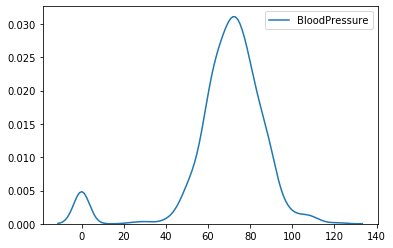

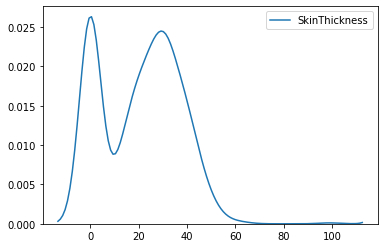

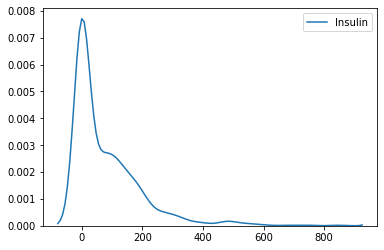

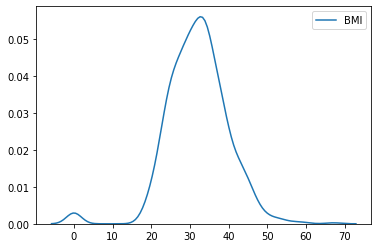

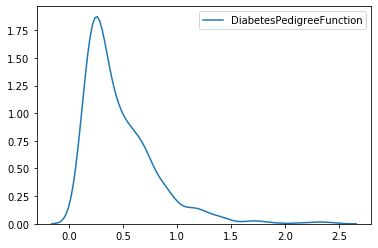

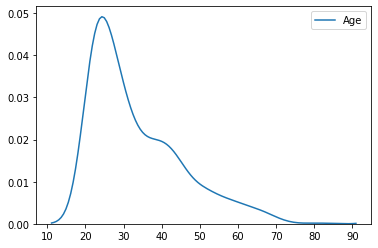

In [35]:
for i in df.drop(columns='Outcome').columns:
    sns.kdeplot(df[i])
    plt.show()

In [36]:
##We can see that except Outcome, all other variables are quantitative/numerical and continuous in nature

In [38]:
df['Outcome'] = df['Outcome'].astype(object) ##Converting outcome to categorical

# Summary of the Dataset

In [40]:
df.describe().T ##Quantitative variables summary

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
##From the summary above,and the kdeplots above, we can see that the variables such as DiabetesPedigreeFunction,
#Insulin and Age are highly skewed. We will later check the boxplot as well

In [41]:
df.describe(include=object) ##Qualitative variable summary--in this case, we have only Target

,Outcome
count,768
unique,2
top,0
freq,500


In [42]:
df.describe(include=object) ##Qualitative variable summary--in this case, we have only Target

,Outcome
count,768
unique,2
top,0
freq,500


In [45]:
(df['Outcome'].value_counts(normalize=True)*100)  #around 65.10% values for zero as outcome and around 34.89% for ones as 
#outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

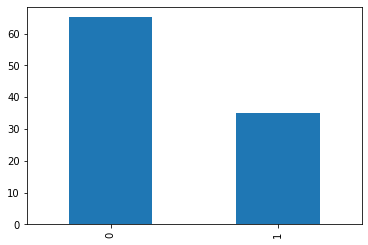

In [46]:
(df['Outcome'].value_counts(normalize=True)*100).plot.bar()

# Checking anomalies (Nulls, Outliers, Imbalance)

In [48]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
##WE see that we have no missing/null values in the data

In [ ]:
##Now checking outliers

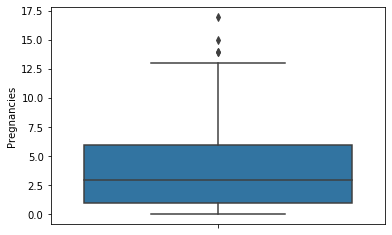

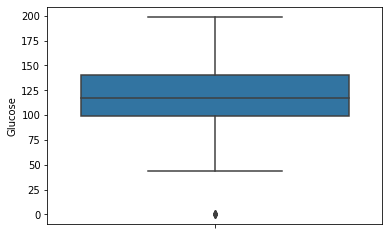

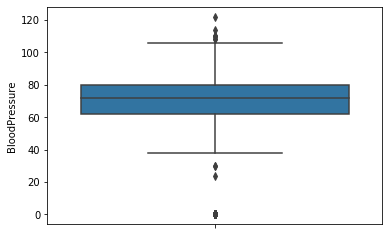

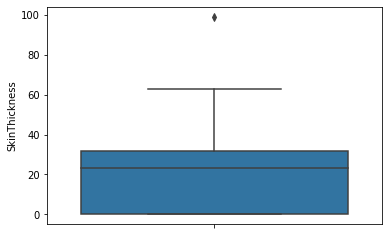

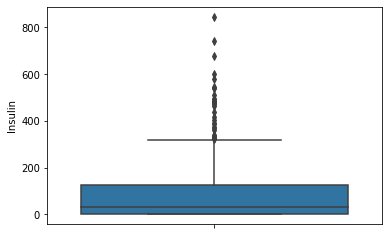

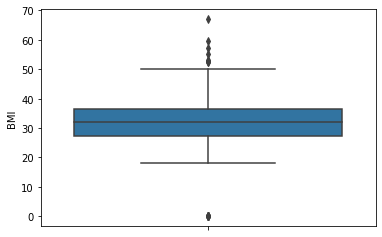

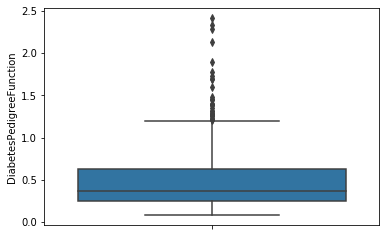

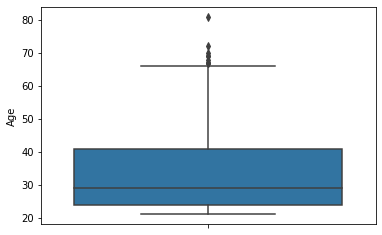

In [51]:
##Outlier check for quantitative variables
for i in list(df.dtypes[df.dtypes!=object].index):
    sns.boxplot(df[i],orient='v')
    plt.show()

In [ ]:
##Insulin and DiabetesPedigreeFunction seem to have the highest number of outliers, that is above the range of
##Q3+(1.5*IQR), Q3 being the third quartile and IQR being Inter Quartile Range
##Pregnancies, Skinthickness, Age also have outliers above Q3+(1.5*IQR)
#Glucose has outlier below Q1-(1.5*IQR)
#Blood Pressure and BMI have outliers on both sides, above Q3+(1.5*IQR) and below Q1-(1.5*IQR)

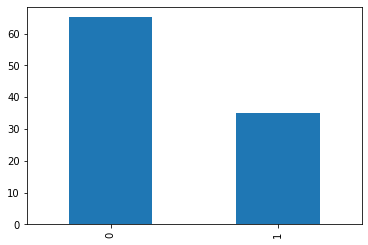

In [52]:
##Checking class imbalance:
(df['Outcome'].value_counts(normalize=True)*100).plot.bar()

In [53]:
(df['Outcome'].value_counts(normalize=True)*100)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
##There does not seem to be any imbalance in the target class, outcome. 
##It is well balanced

In [ ]:
#WE'll plot the outliers for all variables once more and check

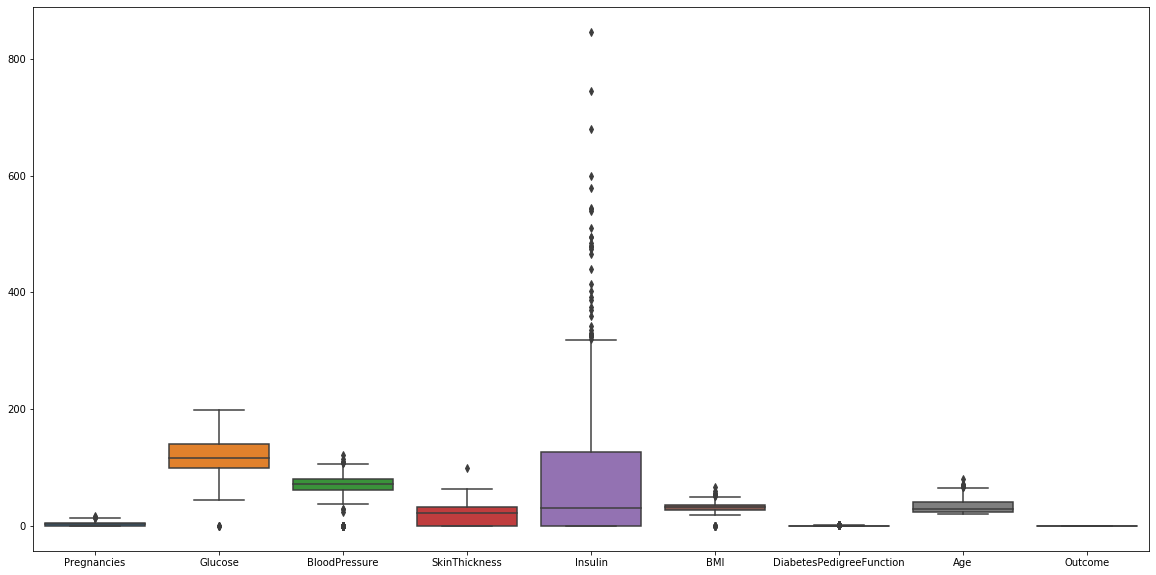

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [63]:
##We will remove outliers from Insulin first

In [64]:
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Insulin']>ll)&(df['Insulin']<ul)]

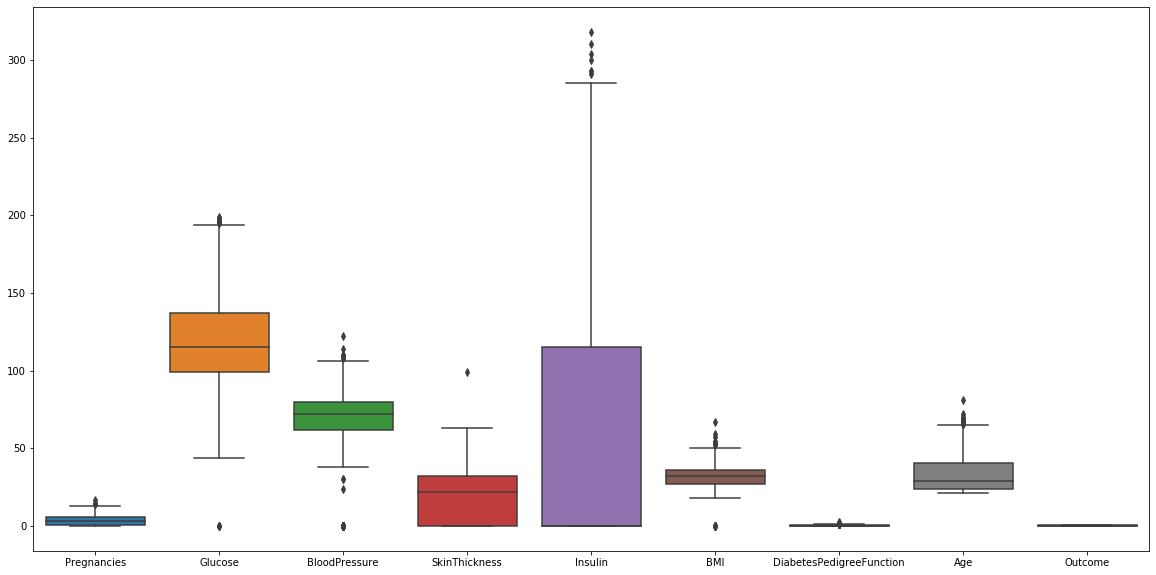

In [65]:
##Checking box plot again:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1)

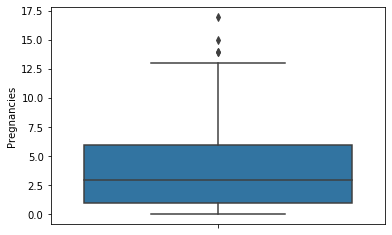

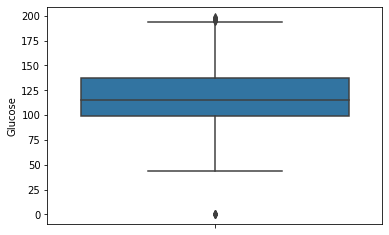

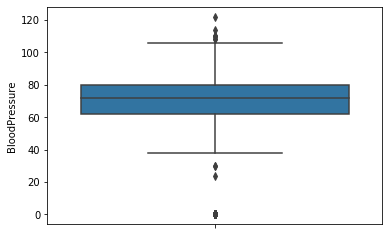

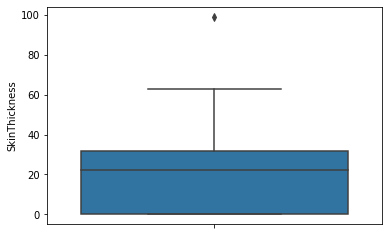

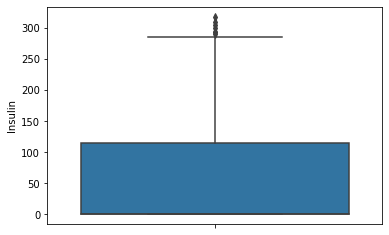

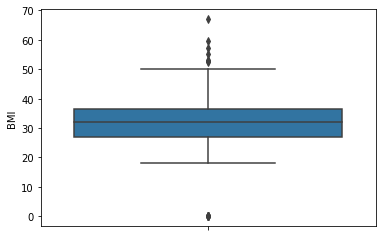

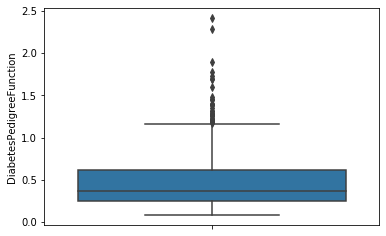

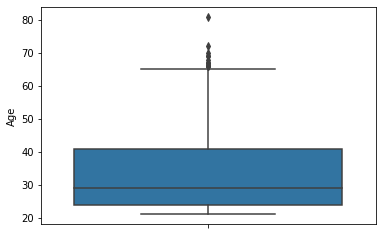

In [66]:
##Seems fairly okay, but let's check boxplots separately as well:
##Outlier check for quantitative variables
for i in list(df1.dtypes[df1.dtypes!=object].index):
    sns.boxplot(df1[i],orient='v')
    plt.show()

In [67]:
#DiabetesPedigreeFunction seems to have extreme outliers at the moment, so we will try to remove outliers from there:
q1 = df1['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df1['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['DiabetesPedigreeFunction']>ll)&(df1['DiabetesPedigreeFunction']<ul)]

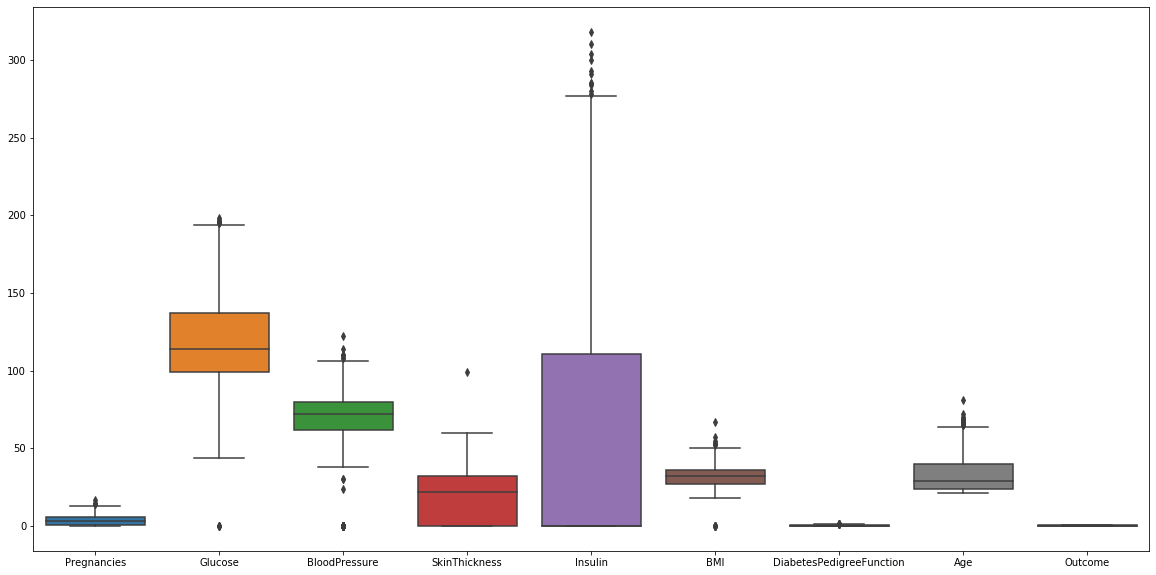

In [68]:
##Checking boxplot again:
##Checking box plot again:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2)

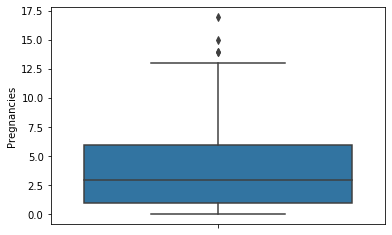

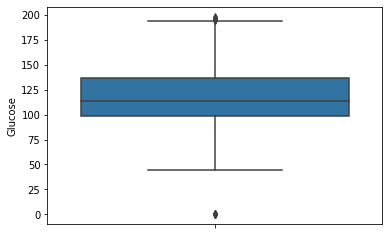

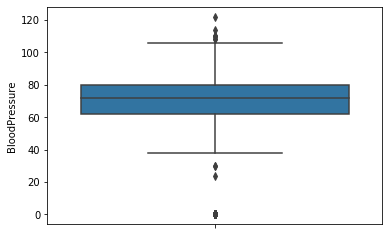

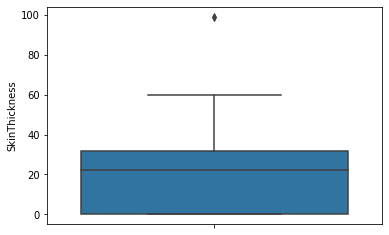

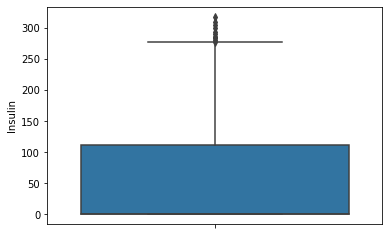

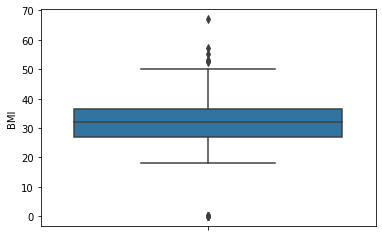

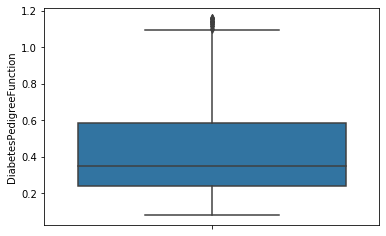

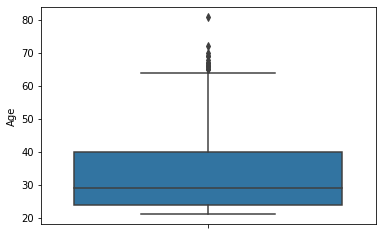

In [69]:
##Outlier check for quantitative variables
for i in list(df2.dtypes[df2.dtypes!=object].index):
    sns.boxplot(df2[i],orient='v')
    plt.show()

In [70]:
##Data looks fairly clean now.
##Let's check the distributions once more

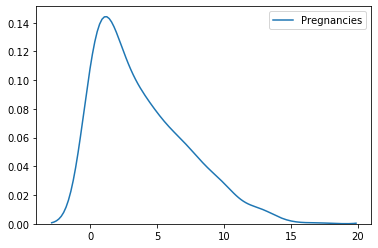

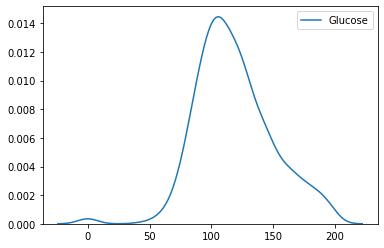

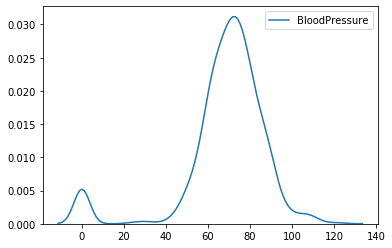

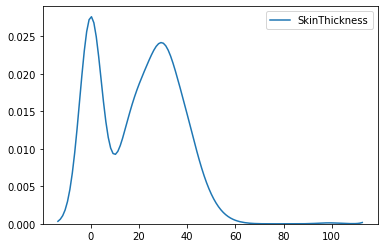

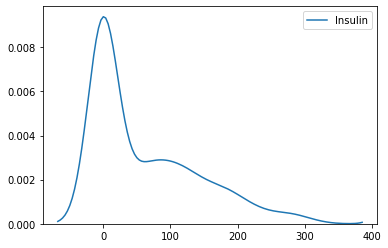

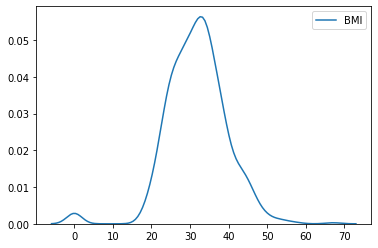

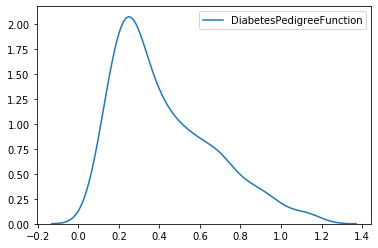

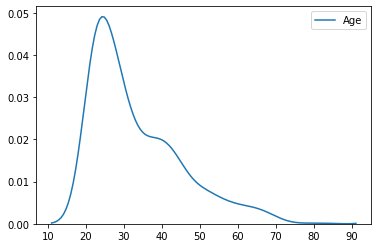

In [71]:
for i in df2.drop(columns='Outcome').columns:
    sns.kdeplot(df2[i])
    plt.show()

In [ ]:
##Variables like Insulin and Age look highly skewed but for now let's proceed without scaling.
##We will come back to this position if we see the need for scaling while building the model

# Are Any independant variables related to the Target?

In [75]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


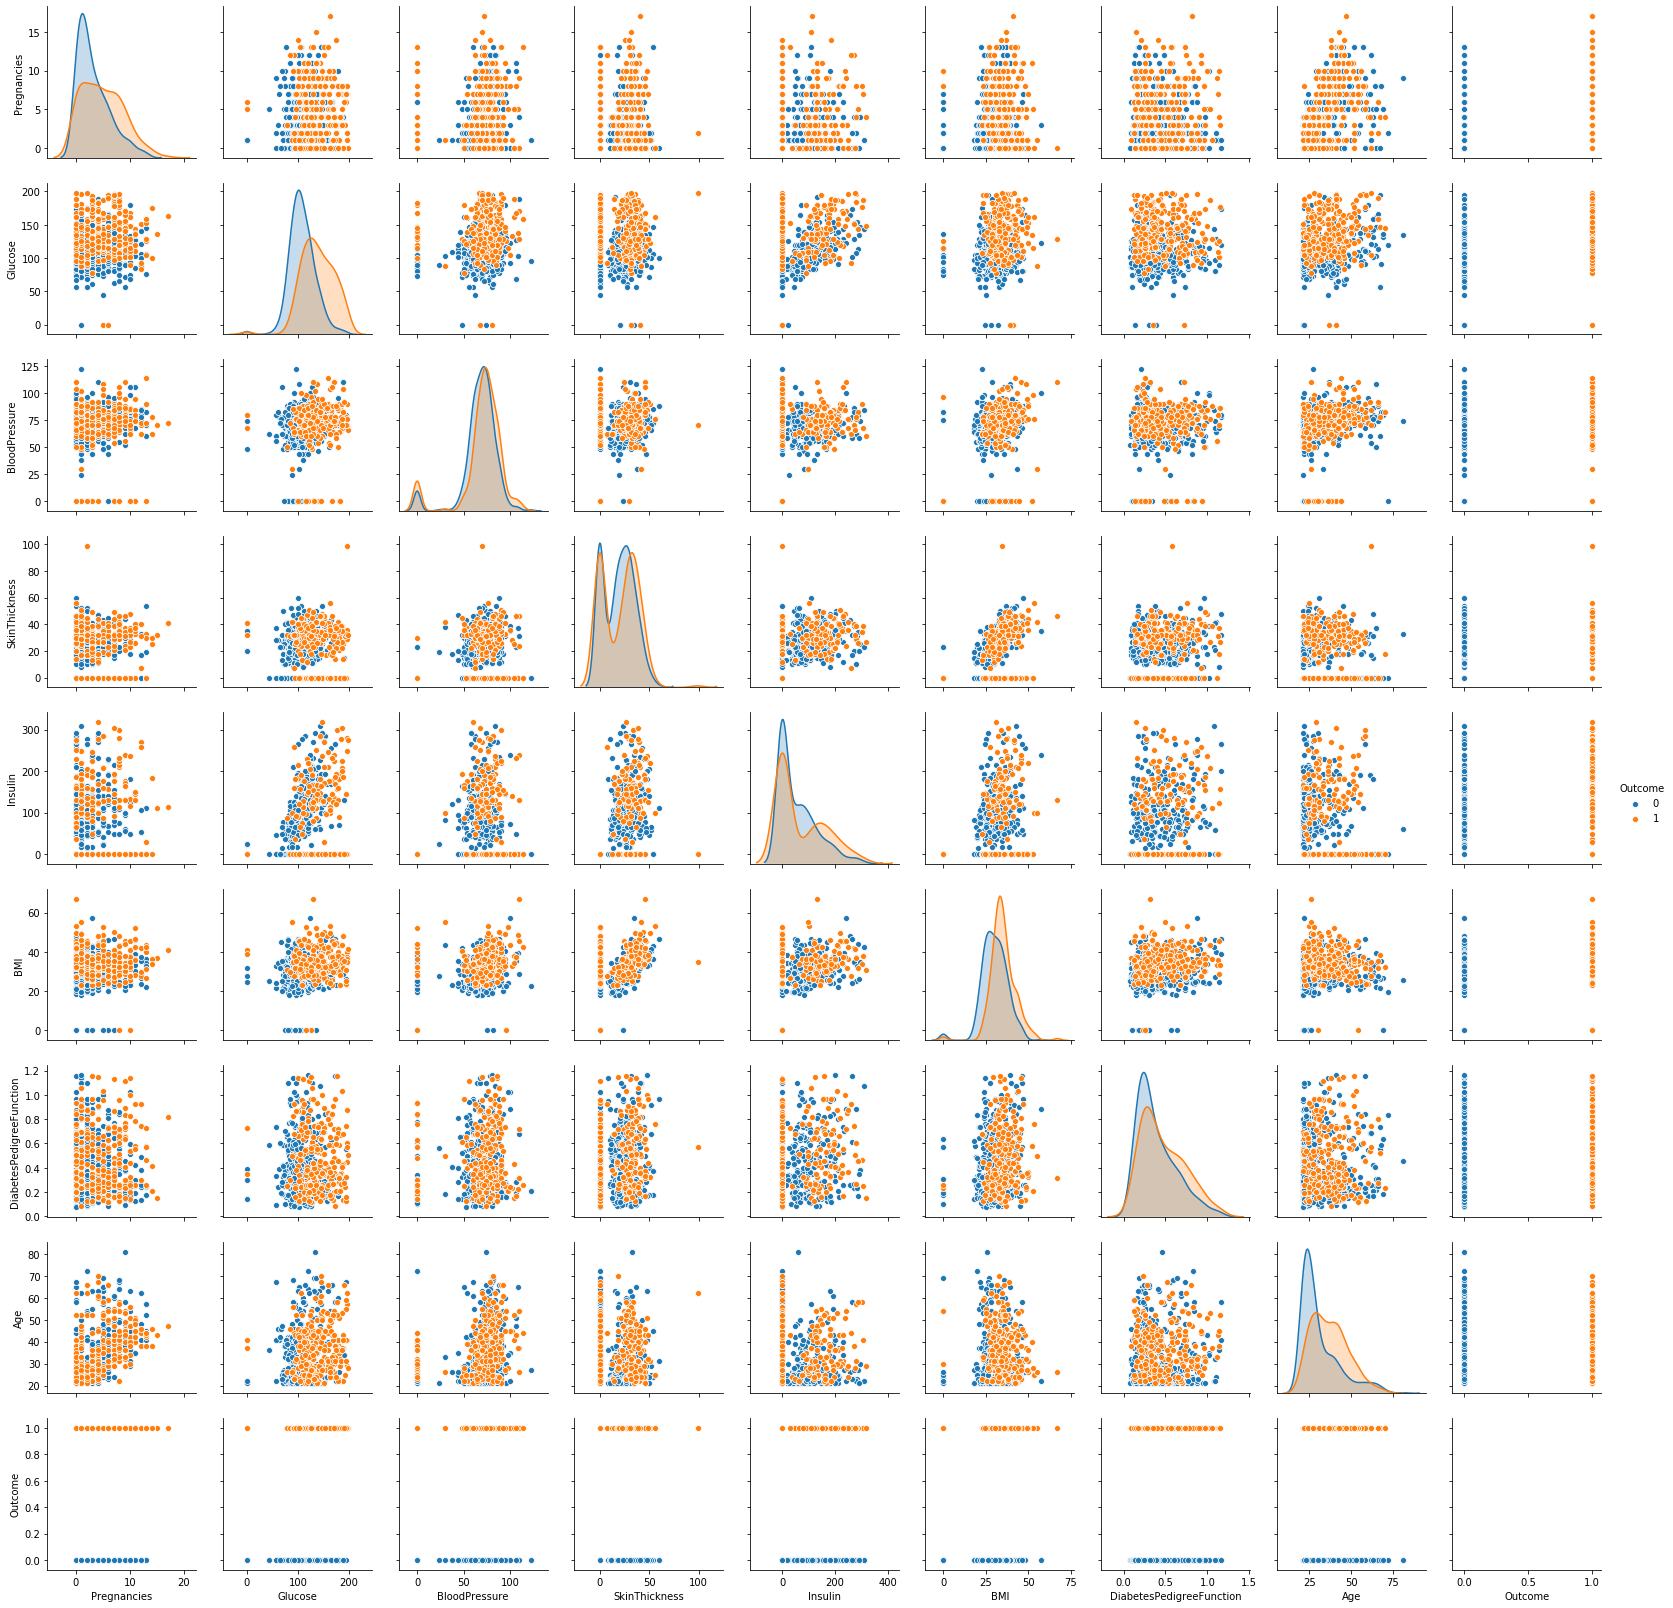

In [78]:
sns.pairplot(data=df2,hue='Outcome')

In [ ]:
##We can see that target is not correlated to any variable as no particular line can established for a fit, in the case of
#any variables plotted against target

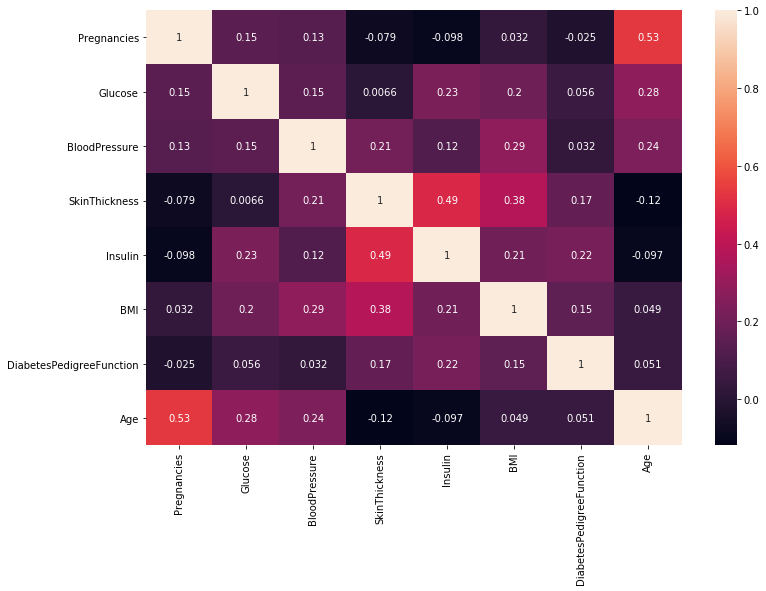

In [74]:
##Let's check heatmap to see if multi-collinearity exists(we are currently using df2)
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t) 
plt.show()

In [ ]:
##Among independant variables:
#We see that Age and Pregnancies, and Insulin and SkinThickness are correlated, but the value does not seem that high,
#to take a decision to drop one of them at the moment. We will check whether we need to drop them while building the model

##With the target: From the pairplot, we saw that no variable is correlated with the target, so at this moment, we don't need
#to drop any variables

In [ ]:
##some variables are correlated to some extent, but we will not drop them at this moment, because their correlation does not
#seem high enough to affect our model. IF it affects the model, we can remove them later using VIF and Feature selection
#techniques such as Backward elimination



# Data Split and Statistical Check for verifying that Sample represents the Population

In [79]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [98]:
X = df2.drop(columns='Outcome')
y = df2['Outcome']
X1 = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)

In [100]:
##Checking if both train and test representative of the overall data

In [101]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.839260,118.477952,68.827881,19.779516,61.512091,31.802276,0.423461,33.136558
std,3.362445,30.866993,19.849798,15.933928,78.591171,7.826713,0.243751,11.755273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.237500,24.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.349000,29.000000
75%,6.000000,137.000000,80.000000,32.000000,111.000000,36.300000,0.582500,40.000000
max,17.000000,198.000000,122.000000,99.000000,318.000000,67.100000,1.162000,81.000000


In [102]:
X_train.describe()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,1.0,3.794715,117.617886,68.493902,19.310976,57.554878,31.690854,0.426382,32.892276
std,0.0,3.281829,30.315522,18.882690,15.953434,74.700727,7.421904,0.242158,11.503412
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.0,1.000000,99.000000,62.000000,0.000000,0.000000,27.075000,0.237000,24.000000
50%,1.0,3.000000,114.000000,70.000000,21.000000,0.000000,32.000000,0.364000,29.000000
75%,1.0,6.000000,133.000000,78.000000,32.000000,105.000000,35.900000,0.586250,40.000000
max,1.0,17.000000,198.000000,110.000000,99.000000,304.000000,57.300000,1.162000,72.000000


In [103]:
X_test.describe()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.0,3.943128,120.483412,69.606635,20.872038,70.739336,32.062085,0.416649,33.706161
std,0.0,3.549190,32.100192,21.968197,15.872340,86.476164,8.711185,0.247874,12.331875
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.0,1.000000,97.500000,64.000000,0.000000,0.000000,26.950000,0.238500,24.000000
50%,1.0,3.000000,118.000000,72.000000,23.000000,36.000000,32.400000,0.329000,29.000000
75%,1.0,6.000000,142.000000,81.000000,33.000000,128.500000,36.850000,0.546000,42.000000
max,1.0,15.000000,196.000000,122.000000,56.000000,318.000000,67.100000,1.159000,81.000000


In [104]:
##WE can see that the mean data from X, X_test and X_train resemble each other(means are close by to each other, for
#every independant variable,and hence we can claim that train and test are represetative of overall data)

0    0.672831
1    0.327169
Name: Outcome, dtype: float64


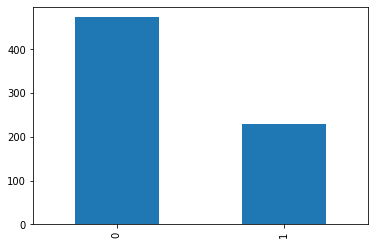

0    0.686992
1    0.313008
Name: Outcome, dtype: float64


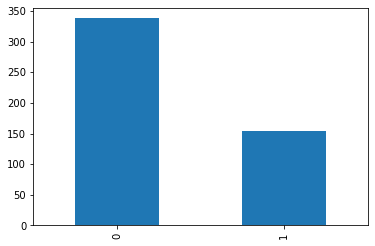

0    0.63981
1    0.36019
Name: Outcome, dtype: float64


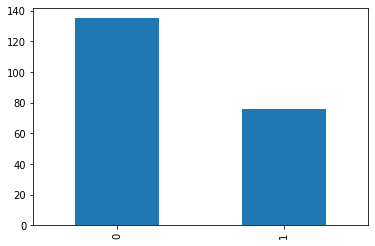

In [105]:
##We can do the same for the target by doing the count
print(y.value_counts(normalize=True))
y.value_counts().plot.bar()
plt.show()
print(y_train.value_counts(normalize=True))
y_train.value_counts().plot.bar()
plt.show()
print(y_test.value_counts(normalize=True))
y_test.value_counts().plot.bar()
plt.show()

In [ ]:
##We can see that the train and test data fairly represent the overall data, through the plots

In [106]:
#We can also do a ttest for the target:

In [107]:
from scipy.stats import ttest_1samp

In [108]:
#ttest_1samp(sample,pop_mean)

In [109]:
ttest_1samp(y_train,y.mean())

Ttest_1sampResult(statistic=-0.6766833509448679, pvalue=0.498925533907954)

In [110]:
ttest_1samp(y_test,y.mean())

Ttest_1sampResult(statistic=0.9967802462580163, pvalue=0.32001834883858155)

In [111]:
print('Mean is %2.1f Sd is %2.1f' % (y.mean(),np.std(y,ddof = 1)))

Mean is 0.3 Sd is 0.5


In [ ]:
#PValue greater than significance level-0.05--accept null hypothesis, which means that train data
#and test data does represent the population

# Base Model

In [ ]:
##Taking the base model as Logistic Regression in order to check the coefficients of the variables,
##and using the parameters produced, we can determine the significance and the odds for the each variable to affect the target

In [119]:
#For logistic regression, we will convert the target to numeric
X = df2.drop(columns='Outcome')
y = df2['Outcome'].astype(int)
X1 = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)

In [120]:
model1 = sm.Logit(y_train,X_train)
result1 = model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.448388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  492
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                            8
Date:                Wed, 22 Jan 2020   Pseudo R-squ.:                  0.2785
Time:                        11:23:49   Log-Likelihood:                -220.61
converged:                       True   LL-Null:                       -305.77
Covariance Type:            nonrobust   LLR p-value:                 1.101e-32
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.6124      0.942     -9.140      0.000     -10.459      -6.766
Pregnancies                  0.1349      0.042      3.189      0.001       0.052       0.218
Glucose                      0.0371      0.005      7.470      0.000       0.027       0.047
BloodPressure               -0.0161      0.006     -2.511      0.012      -0.029      -0.004
SkinThickness                0.0004      0.009      0.041      0.968      -0.018       0.018
Insulin                     -0.0013      0.002     -0.702      0.483      -0.005       0.002
BMI                          0.0923      0.020      4.719      0.000       0.054       0.131
DiabetesPedigreeFunction     1.0516      0.485      2.167      0.030       0.100       2.003
Age                          0.0133      0.012      1.079      0.280      -0.011       0.037
============================================================================================
"""

In [121]:
#We see that SkinThickness, Insulin and Age have a higher Pvalue than 0.05(which we will consider as the significance level)
#and hence these variables will hold less value for us while building the model
#check check multi collinearity using VIF:

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
pd.DataFrame({'vif': vif}, index=X1.columns)[1:]

,vif
Pregnancies,1.405463
Glucose,1.235540
BloodPressure,1.185195
SkinThickness,1.558420
Insulin,1.481270
BMI,1.285351
DiabetesPedigreeFunction,1.076698
Age,1.592063


In [ ]:
#VIF is less than 4 for all the variables, so now let's check for significant variables using Backward Elimination

In [ ]:
##Now all variables seem significant

In [ ]:
##We can also check which variables Feature Selection will select. We can try Backward elimination

In [126]:
cols = list(X1.columns)
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        print('Variable removed:',feature_with_p_max,pmax)

    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.453324
         Iterations 7
Variable removed: SkinThickness 0.64625242636364
Optimization terminated successfully.
         Current function value: 0.453473
         Iterations 7
Variable removed: Age 0.2789357932077521
Optimization terminated successfully.
         Current function value: 0.454301
         Iterations 6
Variable removed: Insulin 0.13796296483546786
Optimization terminated successfully.
         Current function value: 0.455884
         Iterations 6
['const', 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


In [127]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
##So, we choose to drop SkinThickness, Insulin and Age, for a better model

In [128]:
y = df2['Outcome'].astype(int)
X1 = X1[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)
model2 = sm.Logit(y_train,X_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.575901
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  492
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Jan 2020   Pseudo R-squ.:                 0.07335
Time:                        11:32:05   Log-Likelihood:                -283.34
converged:                       True   LL-Null:                       -305.77
Covariance Type:            nonrobust   LLR p-value:                 4.260e-09
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1352      0.032      4.170      0.000       0.072       0.199
Glucose                      0.0138      0.003      4.192      0.000       0.007       0.020
BloodPressure               -0.0374      0.006     -6.384      0.000      -0.049      -0.026
BMI                         -0.0101      0.013     -0.770      0.441      -0.036       0.016
DiabetesPedigreeFunction     0.1283      0.424      0.302      0.762      -0.703       0.960
============================================================================================
"""

In [ ]:
##From the above model we can see that:
##As Pregnancies, Glucose and DiabetesPedigreeFunction increase, the probabilty of outcome tending to 1 increases
#(as these coefficients are positive)
##As BllodPressure and BMI increase, the probabilty of outcome tending to 0 increases(as these coefficients are negative)

In [131]:
result1.params

const                      -8.612386
Pregnancies                 0.134935
Glucose                     0.037105
BloodPressure              -0.016135
SkinThickness               0.000369
Insulin                    -0.001329
BMI                         0.092266
DiabetesPedigreeFunction    1.051633
Age                         0.013310
dtype: float64

In [132]:
model2.params

Pregnancies                 0.135200
Glucose                     0.013788
BloodPressure              -0.037372
BMI                        -0.010058
DiabetesPedigreeFunction    0.128283
dtype: float64

In [133]:
np.exp(model2.params) ##for the second model, created using variables from Backward elimination

Pregnancies                 1.144766
Glucose                     1.013883
BloodPressure               0.963317
BMI                         0.989992
DiabetesPedigreeFunction    1.136875
dtype: float64

In [ ]:
#As Pregnancies increases by 1, odds of Outcome increase by 14.47%

In [ ]:
##When the BMI increases by 1, odds of Outcome decrease by 2%

In [134]:
np.exp(model2.pvalues)

Pregnancies                 1.000031
Glucose                     1.000028
BloodPressure               1.000000
BMI                         1.554989
DiabetesPedigreeFunction    2.143178
dtype: float64

# Accuracy Check

In [142]:
import sklearn.metrics

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [144]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_prob_test = logreg.predict_proba(X_test)[:,1]
y_pred_test = logreg.predict(X_test)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict(X_train)


print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.accuracy_score(y_train,y_pred_train))

print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.accuracy_score(y_test,y_pred_test))

[[313  25]
 [ 75  79]]
0.7967479674796748
[[124  11]
 [ 44  32]]
0.7393364928909952


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
#Test accuracy is closer to train accuracy, so we can say the accuracy is good in these terms, but of
#course we can improve it

##Accuracy for test is 0.7393364928909952, which seems to be good

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve

In [146]:
a = roc_auc_score(y_train,y_prob_train) ##AUC of train

In [147]:
b= roc_auc_score(y_test,y_prob_test) ##AUC of test

In [148]:
fpr, tpr, thresholds = roc_curve(y_train,y_prob_train)  ##Returns array of FPR, TPR, thresholds

In [149]:
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_prob_test)

0.8303043110735419 AUC train


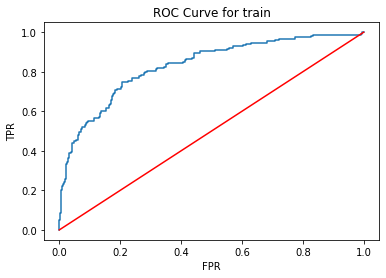

In [150]:
print(a,'AUC train')
plt.plot(fpr,tpr)   ##For train
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

0.8232943469785576 AUC test


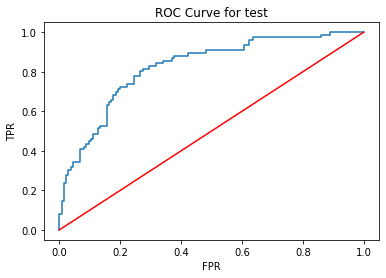

In [151]:
print(b,'AUC test')
plt.plot(fpr1,tpr1)   ##For test
plt.plot(fpr1,fpr1,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for test')
plt.show()

In [152]:
thresholds[thresholds>1] = 1

In [153]:
thresholds

array([1.        , 0.9589592 , 0.85127169, 0.84185153, 0.8038697 ,
       0.79235302, 0.7310984 , 0.72901879, 0.72117264, 0.71644128,
       0.71277718, 0.71162026, 0.71081553, 0.70836274, 0.69123258,
       0.68929771, 0.66907497, 0.66783465, 0.64999592, 0.64940111,
       0.6424962 , 0.64229964, 0.62984438, 0.62263004, 0.6018385 ,
       0.59855203, 0.59677092, 0.59593673, 0.57160622, 0.56704302,
       0.56689934, 0.55352561, 0.5531226 , 0.53289953, 0.52317739,
       0.52257916, 0.52104638, 0.51813804, 0.50307306, 0.50008691,
       0.49857   , 0.49407696, 0.49118797, 0.48997854, 0.48961321,
       0.48739444, 0.48540682, 0.47287628, 0.47249407, 0.44890594,
       0.44833065, 0.44789737, 0.4470833 , 0.43472456, 0.43340222,
       0.43202798, 0.42870485, 0.42420659, 0.40746379, 0.39508077,
       0.39194734, 0.3895972 , 0.38348455, 0.38215386, 0.38192035,
       0.38168831, 0.37906821, 0.37743477, 0.37206676, 0.37045829,
       0.36944681, 0.36760254, 0.35843234, 0.35723599, 0.35498

0.8303043110735419 AUC train


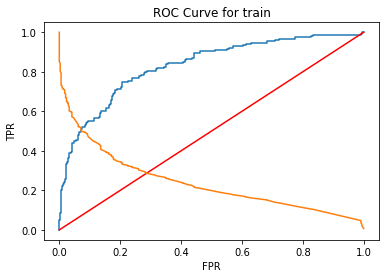

In [154]:
print(a,'AUC train')
plt.plot(fpr,tpr)   ##For train
plt.plot(fpr,fpr,'r-')
plt.plot(fpr,thresholds)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

0.8303043110735419 AUC train


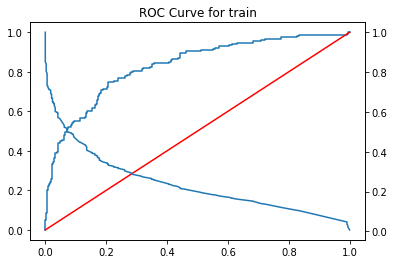

In [155]:
print(a,'AUC train')


fig,ax = plt.subplots()

ax.plot(fpr,tpr)   ##For train
ax.plot(fpr,fpr,'r-')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds)
#plt.xlabel('FPR')
#plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

In [156]:
##Above we saw the AUC and ROC evaluation for our logistic regression models

In [ ]:
#ROC can be better and hence we will try another model to do the same

In [ ]:
#Now, let's try other methods for classification

In [ ]:
#c. Evaluate the model built using Precision, Recall and F1 Score and what will be the
#optimization objective keeping in mind the problem statement. (3 marks) 


#WE are defining a function to do the same

In [172]:


def model_compare(algo,xtrain,xtest,ytrain,ytest,y):
    algo.fit(xtrain,ytrain)
    ypred_train = algo.predict(xtrain)
    ypred_test = algo.predict(xtest)
    ypred_test = pd.Series(ypred_test)
    yprob_train = algo.predict_proba(xtrain)[:,1]
    yprob_test = algo.predict_proba(xtest)[:,1]
    
    print('Accuracy on Train Set',accuracy_score(ytrain,ypred_train))
    print('Accuracy on Test Set',accuracy_score(ytest,ypred_test))
    
    print('AUC ROC on Train Set',roc_auc_score(ytrain,yprob_train))
    print('AUC ROC on Test Set',roc_auc_score(ytest,yprob_test))
    print(ypred_test.value_counts())
    print(confusion_matrix(ytest,ypred_test))
    print(classification_report(ytest,ypred_test))
    
    fpr,tpr,thresholds = roc_curve(ytest,yprob_test)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r-')
    plt.show()
    



# DECISION TREE

In [173]:
X = df2.drop(columns='Outcome')
y = df2['Outcome'].astype(int)

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
dt = DecisionTreeClassifier()

In [177]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [178]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

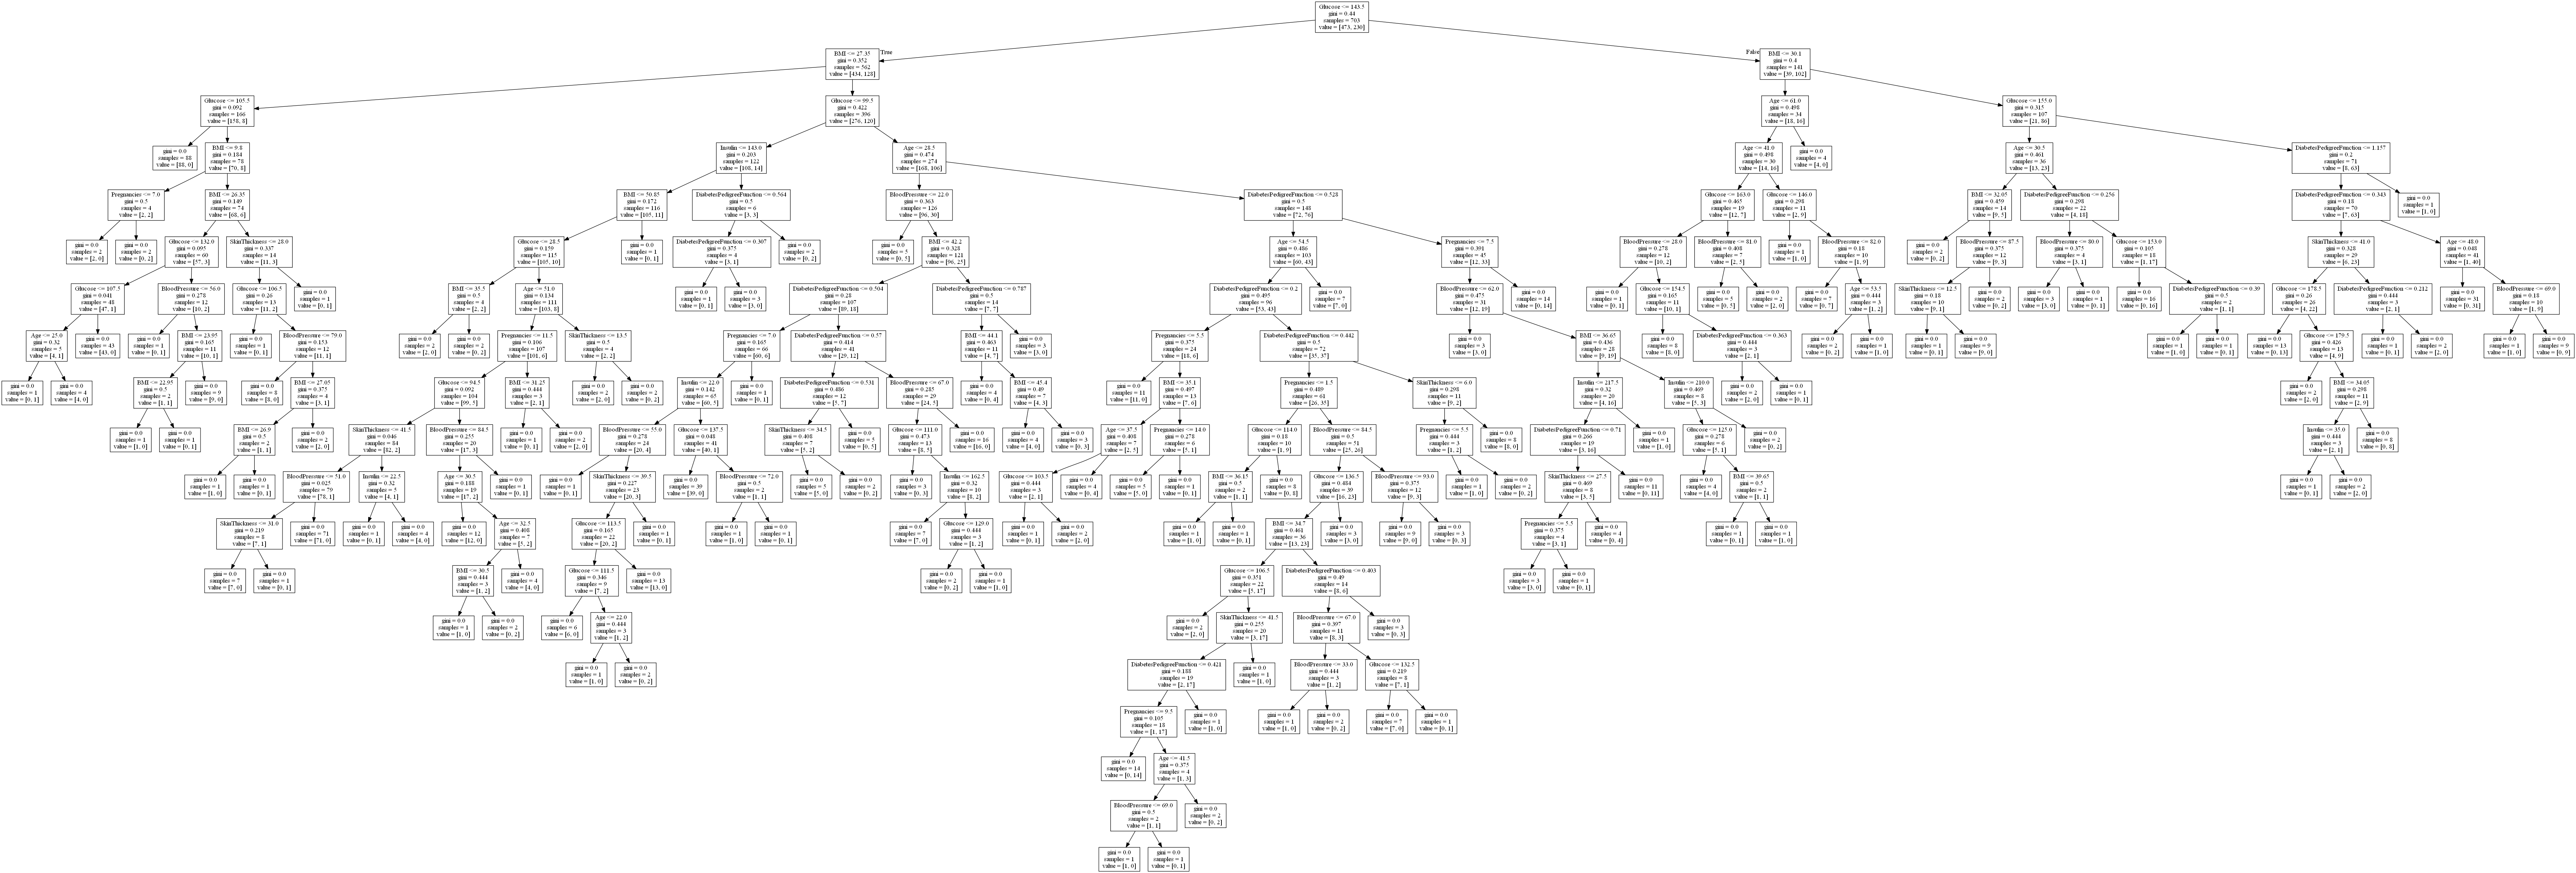

In [179]:
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Accuracy on Train Set 1.0
Accuracy on Test Set 0.6777251184834123
AUC ROC on Train Set 1.0
AUC ROC on Test Set 0.6392384105960265
0    137
1     74
dtype: int64
[[110  41]
 [ 27  33]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.45      0.55      0.49        60

    accuracy                           0.68       211
   macro avg       0.62      0.64      0.63       211
weighted avg       0.70      0.68      0.69       211



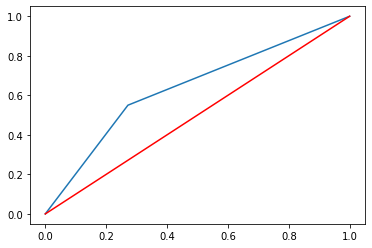

In [180]:
model_compare(dt,X_train,X_test,y_train,y_test,y)

In [ ]:
#Through the precision, recall and F1 score, we can see that the precision is good for one category(0) in the target and bad for
#another category(1), so it means that the prediction of zeros is better than the prediction of 1 in this case
#We need to tune our tree to fit better

In [187]:
#d. How do you improve the accuracy of the model? Write clearly the changes that you will make
#before re-fitting the model. Fit the final model. (5 marks)


#We will tune the hyperparameters of the Decision tree using RandomizedSearchCV

In [188]:
#Hyperparameter tuning in Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparamter tuning--Random Search

In [190]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params  = {'max_depth' : sp_randint(2,10),
    'min_samples_split':sp_randint(2,50),
    'min_samples_leaf':sp_randint(1,20),'criterion':['gini','entropy']}

rand_search = RandomizedSearchCV(dt,param_distributions=params,cv=3,random_state=1)

rand_search.fit(X,y)


print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 19, 'min_samples_split': 6}


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [195]:
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [196]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]
y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

In [197]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [198]:
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

Accuracy of Decision Tree on Test 0.7298578199052133
Accuracy of Decision Tree on Train 0.8170731707317073


In [199]:
print('ROC AUC test',roc_auc_score(y_test,y_prob))
print('ROC AUC train',roc_auc_score(y_train,y_prob_train))

ROC AUC test 0.7650110375275939
ROC AUC train 0.892409572524662


Accuracy on Train Set 0.8170731707317073
Accuracy on Test Set 0.7298578199052133
AUC ROC on Train Set 0.892409572524662
AUC ROC on Test Set 0.7616997792494481
0    134
1     77
dtype: int64
[[114  37]
 [ 20  40]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       151
           1       0.52      0.67      0.58        60

    accuracy                           0.73       211
   macro avg       0.69      0.71      0.69       211
weighted avg       0.76      0.73      0.74       211



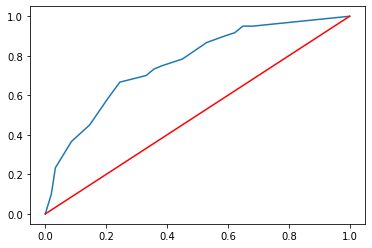

In [200]:
model_compare(dt,X_train,X_test,y_train,y_test,y)

In [ ]:
## WE have increased the accuracy highly after doing the hyperparameter tuning
##Train and test models still show a difference in the accuracy, but we were able to improve the Precision, Recall and 
#the F1 score for the new model

# Selecting tuned DecisionTree as the best fit algorithm

In [203]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

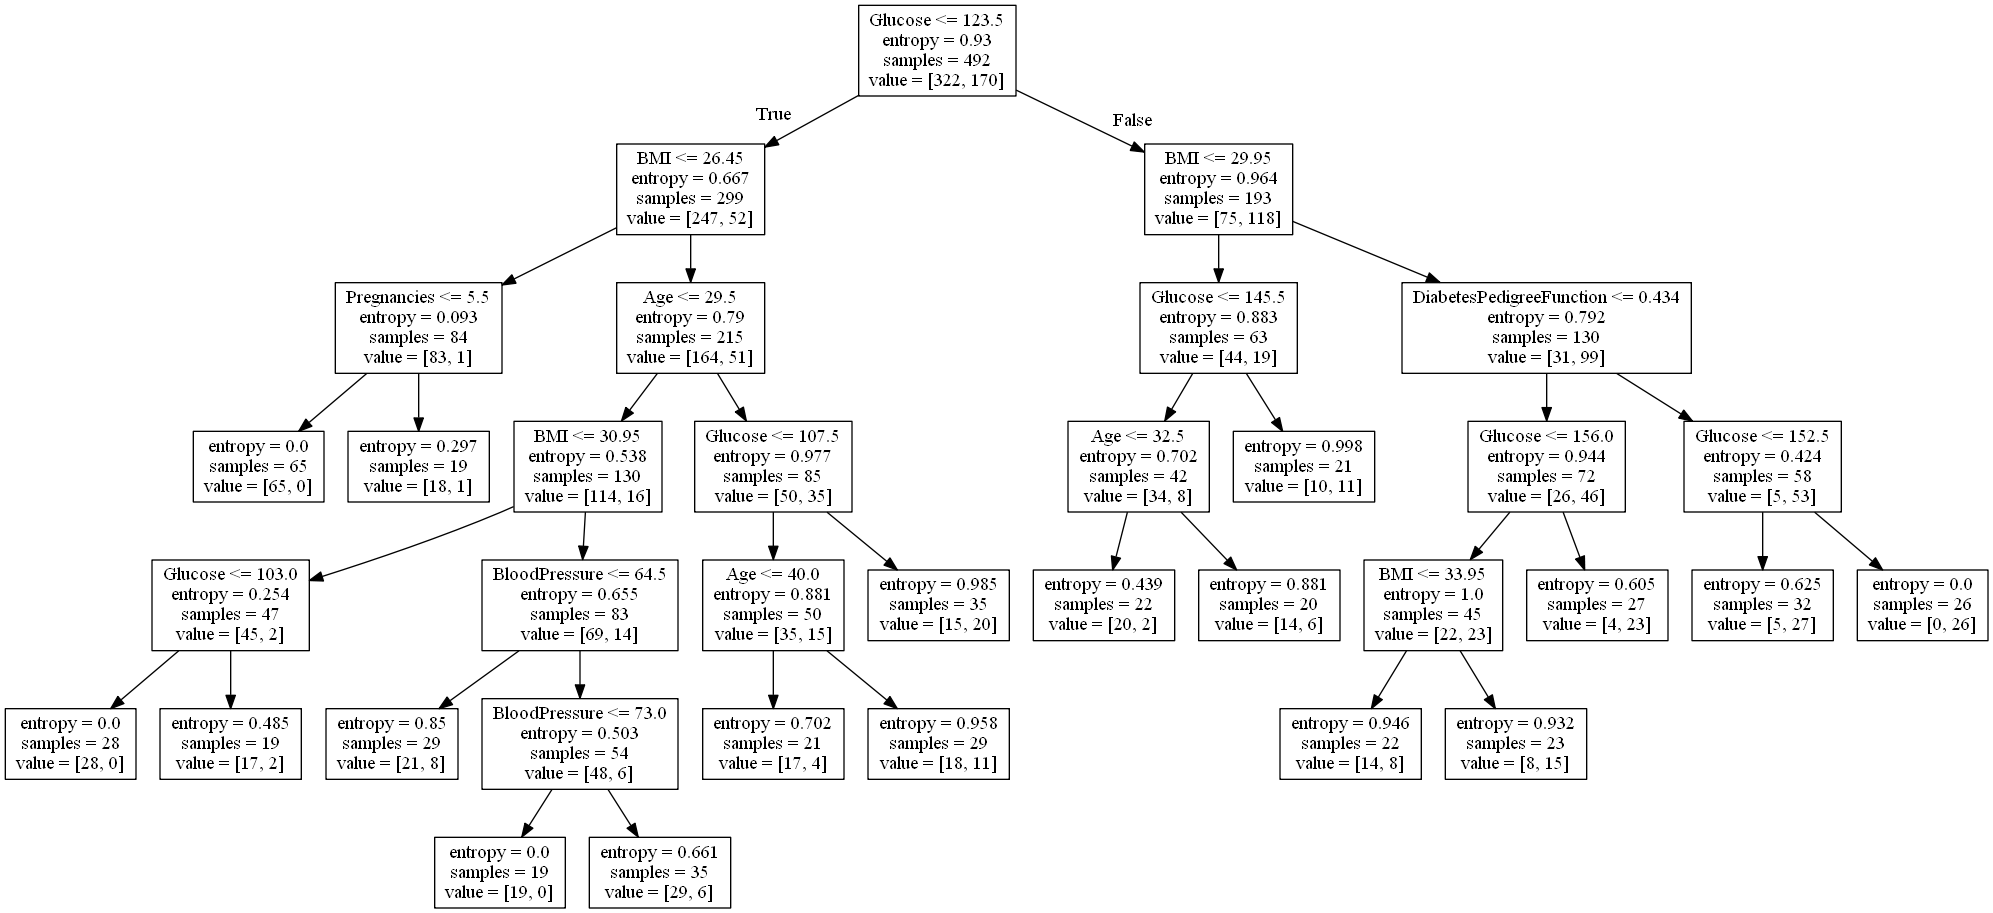

In [204]:
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Interpretation for the Business Stakeholders

In [ ]:
#From the decision tree above, we can see that a particular amount of Glucose is very important for the classification's
#first step, and then variables like BMI, Pregnancy and Age are the next important features for classifying and predicting
#the outcome

In [ ]:
##In our model2 also that we built, we were able to select 'Pregnancies', 'Glucose', 'BloodPressure', 
#'BMI', 'DiabetesPedigreeFunction' for a better prediction, and this proves that For properly detecting whether a person
#has diabetes, we need to keep in mind whether they were Pregnant or not, and how their Glucose levels were performing, 
#alongwith keeping track of how their bloodpressure and BMI varies. DiabetesPedigreeFunction also plays an important role
##Please see params for model2 below

In [201]:
np.exp(model2.params)

Pregnancies                 1.144766
Glucose                     1.013883
BloodPressure               0.963317
BMI                         0.989992
DiabetesPedigreeFunction    1.136875
dtype: float64